In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import KMeans library for clustering
from sklearn.cluster import KMeans

# Import train_test_split, cross_val_score and GridSearchCV functions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Import Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Import scikit-learn StandardScaler module for data standardization
from sklearn.preprocessing import StandardScaler

# For ANN
from keras.models import Sequential
from keras.layers import Dense
from keras_tuner.tuners import RandomSearch

# Increase columns and rows for display to have a better view of the dataframe
pd.set_option("display.max_columns", 100)
pd.set_option("display.min_rows", 100)
%matplotlib inline

In [2]:
# Read dataset
df = pd.read_csv('daft.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            6986 non-null   float64
 1   floor_area       6986 non-null   float64
 2   beds             6986 non-null   float64
 3   baths            6986 non-null   float64
 4   property_type    6986 non-null   object 
 5   floor_area_unit  6986 non-null   object 
 6   price_sq_mt      6986 non-null   float64
dtypes: float64(5), object(2)
memory usage: 382.2+ KB


## Clustering

In [3]:
from sklearn.cluster import KMeans

In [4]:
df2 = df[(df['property_type'] == 'Apartment')|(df['property_type'] == 'Detached')]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4880 entries, 0 to 6985
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            4880 non-null   float64
 1   floor_area       4880 non-null   float64
 2   beds             4880 non-null   float64
 3   baths            4880 non-null   float64
 4   property_type    4880 non-null   object 
 5   floor_area_unit  4880 non-null   object 
 6   price_sq_mt      4880 non-null   float64
dtypes: float64(5), object(2)
memory usage: 305.0+ KB


In [5]:
x = df2.iloc[:, [0, 1]].values

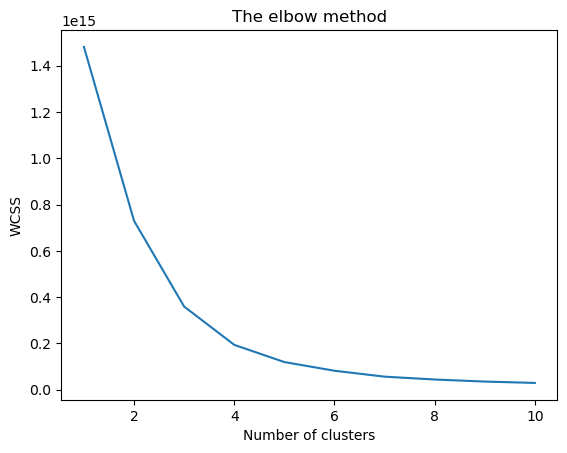

In [6]:
# Finding the optimum number of clusters

# Declare an array for the sum of the squared distance between each member of the cluster and its centroid.
wcss = []

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

In [7]:
# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 4, max_iter = 300, n_init = 10, random_state = 0)

# n_initint, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x)

print(y_kmeans)

[3 0 2 ... 0 2 0]


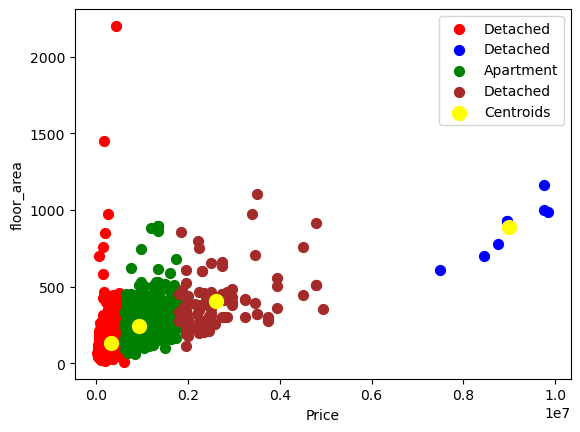

In [8]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Detached')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Detached')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Apartment')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'brown', label = 'Detached')
# For two clusters, remove the second last two python statements from the above four python statements

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1:2], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('Price')
plt.ylabel('floor_area')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend() 

## Classification

### RandomForestClassifier

In [9]:
df3 = df.copy()

Training set score: 0.99
Test set score: 0.74
              precision    recall  f1-score   support

   Apartment       0.84      0.83      0.84       433
    Detached       0.77      0.76      0.76      1022
      Semi-D       0.63      0.65      0.64       641

    accuracy                           0.74      2096
   macro avg       0.75      0.75      0.75      2096
weighted avg       0.74      0.74      0.74      2096

Cross validation accuracy mean: 0.74 +/- 0.03
Cross validation accuracy results: [0.77, 0.73, 0.76, 0.76, 0.77, 0.79, 0.75, 0.72, 0.75, 0.79, 0.7, 0.74, 0.69, 0.72, 0.75, 0.74, 0.74, 0.73, 0.74, 0.7]


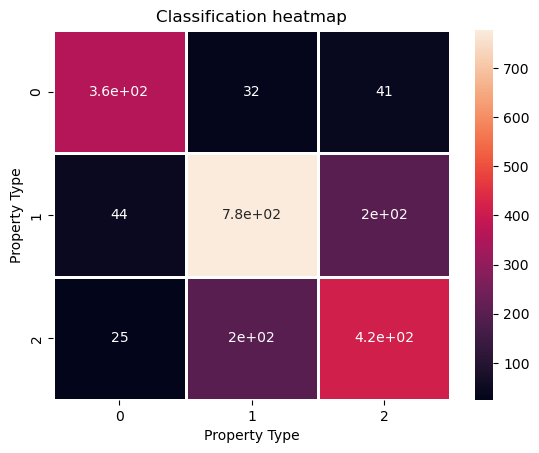

In [10]:
X = df3.drop(['property_type','floor_area_unit'], axis=1)
y = df3['property_type']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Create Classifier
RFclf1 = RandomForestClassifier(random_state=42) # default n_estimators = 100

# Train the model using the training sets
RFclf1.fit(X_train,y_train)

# Make predictions on the testing set
y_pred = RFclf1.predict(X_test)

# Model Accuracy
print("Training set score: {:.2f}".format(RFclf1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(RFclf1.score(X_test, y_test)))

# Calculate confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True, linewidths = 2).set(title='Classification heatmap',xlabel='Property Type', ylabel='Property Type');

# print the classification_report based on y_test and y_predict
print(metrics.classification_report(y_test, y_pred))

# Cross validation
cv_scores = np.around(cross_val_score(RFclf1, X, y, scoring='accuracy', cv = 20),2).tolist()
cv_mean = round(np.mean(cv_scores),2)
cv_std = round(np.std(cv_scores),2)

print(f'Cross validation accuracy mean: {cv_mean} +/- {cv_std}')
print(f'Cross validation accuracy results: {cv_scores}')

RandomForestClassifier(max_depth=10, n_estimators=700)
Training set score: 0.86
Test set score: 0.77
              precision    recall  f1-score   support

   Apartment       0.81      0.84      0.83       432
    Detached       0.77      0.83      0.80       998
      Semi-D       0.75      0.64      0.69       666

    accuracy                           0.77      2096
   macro avg       0.78      0.77      0.77      2096
weighted avg       0.77      0.77      0.77      2096



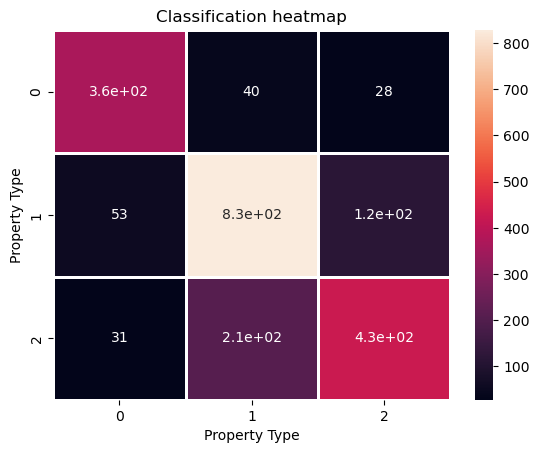

In [11]:
X = df3.drop(['property_type','floor_area_unit'], axis=1)
y = df3['property_type']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Initialise RandomForestClassifier
rfclf = RandomForestClassifier()

# parameter dictionary for GridSearchCV
param_grid = {
    'n_estimators': [100,500,700,900,1000],
    'max_depth': [None,10,15,20,25,50]
}

# Modelling with GridSearchCV result
rfclfgr = GridSearchCV(rfclf, param_grid, cv=10)
rfclfgr.fit(X_train, y_train)

print(rfclfgr.best_estimator_)

# result --> RandomForestClassifier(max_depth=10) 20 minutes to run

# Make predictions on the testing set
y_pred = rfclfgr.predict(X_test)

# Model Accuracy
print("Training set score: {:.2f}".format(rfclfgr.score(X_train, y_train))) # --> 0.87
print("Test set score: {:.2f}".format(rfclfgr.score(X_test, y_test))) # --> 0.76

# Calculate confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True, linewidths = 2).set(title='Classification heatmap',xlabel='Property Type', ylabel='Property Type');

# print the classification_report based on y_test and y_predict
print(metrics.classification_report(y_test, y_pred))

# # Cross validation
# cv_scores = np.around(cross_val_score(rfclfgr, X, y, scoring='accuracy', cv = 20),2).tolist()
# cv_mean = round(np.mean(cv_scores),2)
# cv_std = round(np.std(cv_scores),2)

# print(f'Cross validation accuracy mean: {cv_mean} +/- {cv_std}')
# print(f'Cross validation accuracy results: {cv_scores}')

# Cross validation accuracy mean: 0.77 +/- 0.03
# Cross validation accuracy results: [0.78, 0.76, 0.79, 0.78, 0.8, 0.81, 0.78, 0.75, 0.81, 0.81, 0.74, 0.78, 0.72, 0.74, 0.77, 0.75, 0.74, 0.76, 0.75, 0.7]

### Artificial Neural Network

In [12]:
# In order to be able to train the model I need np array type target so first 
# encoding the target feature and then converting the resulting 3 columns into an array

df4 = df.copy()
df4 = pd.get_dummies(data=df4, columns=['property_type'])
df4.head(2)

,price,floor_area,beds,baths,floor_area_unit,price_sq_mt,property_type_Apartment,property_type_Detached,property_type_Semi-D
0,2300000.0,600.0,6.0,5.0,m²,3833.0,0,1,0
1,499000.0,213.0,3.0,3.0,m²,2343.0,0,1,0


In [13]:
X = df4.drop(['floor_area_unit','property_type_Apartment','property_type_Detached','property_type_Semi-D'], axis=1)
y = df4[['property_type_Apartment', 'property_type_Detached', 'property_type_Semi-D']]

# convert the features and target variables to numpy arrays
X = np.array(X)
y = np.array(y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Use standardized data
sc = StandardScaler()

# Train the model 
X_train = sc.fit_transform(X_train)

# Transforms the test data
X_test = sc.transform(X_test)

In [14]:
X_test[0], y_test[0]

(array([-0.42132513, -1.05372507, -1.94250146, -1.14029707,  1.72452477]),
 array([1, 0, 0], dtype=uint8))

In [15]:
# Create an ANN model
model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/50
5/5 [==============================] - 2s 203ms/step - loss: 1.0356 - accuracy: 0.5106 - val_loss: 0.9979 - val_accuracy: 0.5802
Epoch 2/50
5/5 [==============================] - 0s 44ms/step - loss: 0.9712 - accuracy: 0.6215 - val_loss: 0.9463 - val_accuracy: 0.6374
Epoch 3/50
5/5 [==============================] - 0s 30ms/step - loss: 0.9235 - accuracy: 0.6630 - val_loss: 0.9055 - val_accuracy: 0.6479
Epoch 4/50
5/5 [==============================] - 0s 45ms/step - loss: 0.8844 - accuracy: 0.6693 - val_loss: 0.8722 - val_accuracy: 0.6574
Epoch 5/50
5/5 [==============================] - 0s 24ms/step - loss: 0.8509 - accuracy: 0.6765 - val_loss: 0.8437 - val_accuracy: 0.6660
Epoch 6/50
5/5 [==============================] - 0s 25ms/step - loss: 0.8212 - accuracy: 0.6857 - val_loss: 0.8184 - val_accuracy: 0.6751
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 0.7953 - accuracy: 0.6937 - val_loss: 0.7957 - val_accuracy: 0.6803
Epoch 8/50
5/5 [==========

66/66 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.7610
Test accuracy: 0.76
Test loss: 0.58


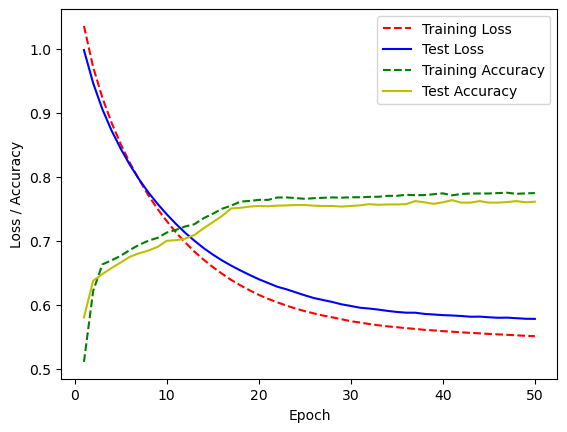

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:.2f}'.format(accuracy))
print('Test loss: {:.2f}'.format(loss))

# Get training and test loss and accuracy histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.plot(epoch_count, training_accuracy, "g--")
plt.plot(epoch_count, test_accuracy, "y-")
plt.legend(["Training Loss", "Test Loss", "Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.show();

### Use Keras tuner to try different combinations of layers and neurons

In [17]:
# pip install keras-tuner

In [18]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(64, input_dim=5, activation='relu'))
    for i in range(hp.Int('layers',1,5)):
        model.add(Dense(
            units=hp.Int('units_'+ str(i),32,512,step=32),
            activation= 'relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
import os

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory=os.path.normpath('/mydir'),
    project_name='keras_tuner'
)

# Note: in order to make this tuner work I had to create a directory C:\mydir (new folder called mydir in disk C main), 
# before it was failing to create the directory due to the use of backslashes as I found online.
# Keras documentation does not explain this in detail and it took a long research to solve this issue.

In [20]:
tuner.search(X_train, y_train, epochs=50, batch_size=1000, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 12s]
val_accuracy: 0.7664599120616913

Best val_accuracy So Far: 0.7683683037757874
Total elapsed time: 00h 01m 22s
INFO:tensorflow:Oracle triggered exit


In [21]:
tuner.results_summary()

Results summary
Results in \mydir\keras_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
layers: 4
units_0: 352
units_1: 128
units_2: 224
units_3: 448
Score: 0.7683683037757874

Trial 1 summary
Hyperparameters:
layers: 4
units_0: 416
units_1: 256
units_2: 512
units_3: 32
Score: 0.7681297659873962

Trial 3 summary
Hyperparameters:
layers: 3
units_0: 192
units_1: 64
units_2: 320
units_3: 32
Score: 0.7681297659873962

Trial 0 summary
Hyperparameters:
layers: 3
units_0: 512
units_1: 32
units_2: 32
Score: 0.7671755850315094

Trial 4 summary
Hyperparameters:
layers: 1
units_0: 288
units_1: 192
units_2: 224
units_3: 480
Score: 0.7664599120616913


In [22]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 352)               22880     
                                                                 
 dense_2 (Dense)             (None, 128)               45184     
                                                                 
 dense_3 (Dense)             (None, 224)               28896     
                                                                 
 dense_4 (Dense)             (None, 448)               100800    
                                                                 
 dense_5 (Dense)             (None, 3)                 1347      
                                                                 
Total params: 199,491
Trainable params: 199,491
Non-trai

In [26]:
# Create an ANN model
model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dense(352, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(244, activation='relu'))
model.add(Dense(448, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/50
5/5 [==============================] - 2s 106ms/step - loss: 1.0064 - accuracy: 0.5454 - val_loss: 0.8728 - val_accuracy: 0.6250
Epoch 2/50
5/5 [==============================] - 0s 46ms/step - loss: 0.7984 - accuracy: 0.6329 - val_loss: 0.7187 - val_accuracy: 0.6951
Epoch 3/50
5/5 [==============================] - 0s 49ms/step - loss: 0.6699 - accuracy: 0.7237 - val_loss: 0.6876 - val_accuracy: 0.7281
Epoch 4/50
5/5 [==============================] - 0s 39ms/step - loss: 0.6411 - accuracy: 0.7505 - val_loss: 0.6578 - val_accuracy: 0.7414
Epoch 5/50
5/5 [==============================] - 0s 39ms/step - loss: 0.6127 - accuracy: 0.7613 - val_loss: 0.6339 - val_accuracy: 0.7467
Epoch 6/50
5/5 [==============================] - 0s 39ms/step - loss: 0.5881 - accuracy: 0.7644 - val_loss: 0.6053 - val_accuracy: 0.7557
Epoch 7/50
5/5 [==============================] - 0s 47ms/step - loss: 0.5725 - accuracy: 0.7675 - val_loss: 0.6104 - val_accuracy: 0.7529
Epoch 8/50
5/5 [==========

66/66 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7634
Test accuracy: 0.76
Test loss: 0.56


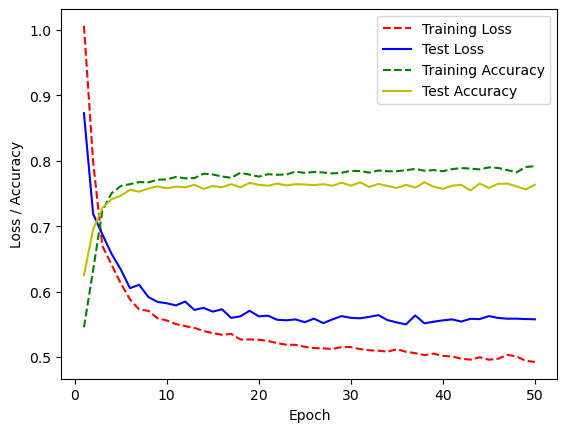

In [27]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:.2f}'.format(accuracy))
print('Test loss: {:.2f}'.format(loss))

# Get training and test loss and accuracy histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.plot(epoch_count, training_accuracy, "g--")
plt.plot(epoch_count, test_accuracy, "y-")
plt.legend(["Training Loss", "Test Loss", "Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.show();

In [25]:
stop

NameError: name 'stop' is not defined

Same but only two possible labels (Detached and Apartment)

In [28]:
df5 = df4[(df4['property_type_Apartment']==1)|(df4['property_type_Detached']==1)].copy()
df5.drop(columns=['property_type_Semi-D'],inplace=True)
df5.head(2)

,price,floor_area,beds,baths,floor_area_unit,price_sq_mt,property_type_Apartment,property_type_Detached
0,2300000.0,600.0,6.0,5.0,m²,3833.0,0,1
1,499000.0,213.0,3.0,3.0,m²,2343.0,0,1


In [29]:
X = df5.drop(['floor_area_unit','property_type_Apartment','property_type_Detached'], axis=1)
y = df5[['property_type_Apartment', 'property_type_Detached']]

# convert the features and target variables to numpy arrays
X = np.array(X)
y = np.array(y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Use standardized data
sc = StandardScaler()

# Train the model 
X_train = sc.fit_transform(X_train)

# Transforms the test data
X_test = sc.transform(X_test)

# Create an ANN model
model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/50
4/4 [==============================] - 1s 74ms/step - loss: 0.5825 - accuracy: 0.8495 - val_loss: 0.5472 - val_accuracy: 0.8634
Epoch 2/50
4/4 [==============================] - 0s 18ms/step - loss: 0.5245 - accuracy: 0.8759 - val_loss: 0.4988 - val_accuracy: 0.8791
Epoch 3/50
4/4 [==============================] - 0s 17ms/step - loss: 0.4789 - accuracy: 0.8817 - val_loss: 0.4607 - val_accuracy: 0.8900
Epoch 4/50
4/4 [==============================] - 0s 20ms/step - loss: 0.4431 - accuracy: 0.8899 - val_loss: 0.4295 - val_accuracy: 0.8948
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 0.4127 - accuracy: 0.8931 - val_loss: 0.4028 - val_accuracy: 0.8989
Epoch 6/50
4/4 [==============================] - 0s 20ms/step - loss: 0.3866 - accuracy: 0.8961 - val_loss: 0.3793 - val_accuracy: 0.8989
Epoch 7/50
4/4 [==============================] - 0s 20ms/step - loss: 0.3633 - accuracy: 0.8978 - val_loss: 0.3584 - val_accuracy: 0.9051
Epoch 8/50
4/4 [===========

46/46 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9255
Test accuracy: 0.93
Test loss: 0.22


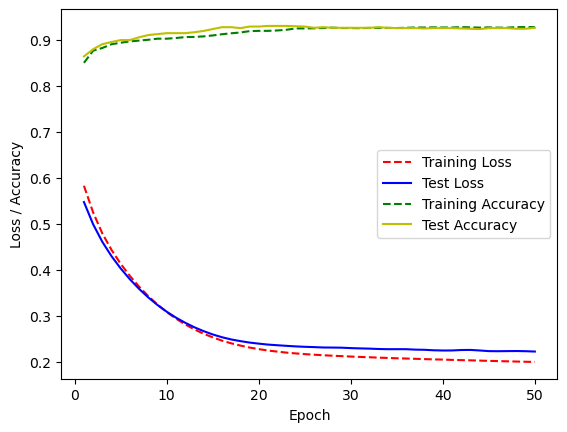

In [30]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:.2f}'.format(accuracy))
print('Test loss: {:.2f}'.format(loss))

# Get training and test loss and accuracy histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.plot(epoch_count, training_accuracy, "g--")
plt.plot(epoch_count, test_accuracy, "y-")
plt.legend(["Training Loss", "Test Loss", "Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.show();